# Hockey Classifier Project

In [159]:
#import relevant packages

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

## EDA

Using Data from the professional database found on kaggle

#### Import CSV's and explore

In [160]:
hof_df = pd.read_csv('data/HOF.CSV')
hof_df.head()

,year,hofID,name,category
0,1945,bakerho01h,Hobey Baker,Player
1,1945,gardich01h,Charlie Gardiner,Player
2,1945,gerared01h,Eddie Gerard,Player
3,1945,mcgeefr01h,Frank McGee,Player
4,1945,morenho01h,Howie Morenz,Player


In [161]:
hof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      366 non-null    int64 
 1   hofID     366 non-null    object
 2   name      366 non-null    object
 3   category  366 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


In [162]:
masterdf = pd.read_csv('data/Master.CSV')
masterdf.head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,...,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      7520 non-null   object 
 1   coachID       395 non-null    object 
 2   hofID         366 non-null    object 
 3   firstName     7748 non-null   object 
 4   lastName      7761 non-null   object 
 5   nameNote      18 non-null     object 
 6   nameGiven     5985 non-null   object 
 7   nameNick      1306 non-null   object 
 8   height        7334 non-null   float64
 9   weight        7336 non-null   float64
 10  shootCatch    7048 non-null   object 
 11  legendsID     6577 non-null   object 
 12  ihdbID        7125 non-null   float64
 13  hrefID        7457 non-null   object 
 14  firstNHL      6851 non-null   float64
 15  lastNHL       6851 non-null   float64
 16  firstWHA      903 non-null    float64
 17  lastWHA       903 non-null    float64
 18  pos           7447 non-null 

In [164]:
masterdf.drop(labels=['deathMon', 'deathDay', 'deathYear', 'deathCountry', 'deathState', 'deathCity', 'nameNote', \
                                   'nameGiven', 'nameNick'], axis=1, inplace=True)


In [165]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      7520 non-null   object 
 1   coachID       395 non-null    object 
 2   hofID         366 non-null    object 
 3   firstName     7748 non-null   object 
 4   lastName      7761 non-null   object 
 5   height        7334 non-null   float64
 6   weight        7336 non-null   float64
 7   shootCatch    7048 non-null   object 
 8   legendsID     6577 non-null   object 
 9   ihdbID        7125 non-null   float64
 10  hrefID        7457 non-null   object 
 11  firstNHL      6851 non-null   float64
 12  lastNHL       6851 non-null   float64
 13  firstWHA      903 non-null    float64
 14  lastWHA       903 non-null    float64
 15  pos           7447 non-null   object 
 16  birthYear     7543 non-null   float64
 17  birthMon      7506 non-null   float64
 18  birthDay      7504 non-null 

In [166]:
scoringdf = pd.read_csv('data/scoring.CSV')
scoringdf.tail()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
45962,zyuzian01,2002,2,MIN,NHL,D,66.0,4.0,12.0,16.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,zyuzian01,2003,1,MIN,NHL,D,65.0,8.0,13.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,zyuzian01,2005,1,MIN,NHL,D,57.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,zyuzian01,2006,1,CAL,NHL,D,49.0,1.0,5.0,6.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
45966,zyuzian01,2007,1,CHI,NHL,D,32.0,2.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
scoringdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45967 entries, 0 to 45966
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  45967 non-null  object 
 1   year      45967 non-null  int64  
 2   stint     45967 non-null  int64  
 3   tmID      45967 non-null  object 
 4   lgID      45967 non-null  object 
 5   pos       45385 non-null  object 
 6   GP        45699 non-null  float64
 7   G         45699 non-null  float64
 8   A         45699 non-null  float64
 9   Pts       45699 non-null  float64
 10  PIM       45699 non-null  float64
 11  +/-       36265 non-null  float64
 12  PPG       37748 non-null  float64
 13  PPA       23040 non-null  float64
 14  SHG       37744 non-null  float64
 15  SHA       23214 non-null  float64
 16  GWG       36567 non-null  float64
 17  GTG       28106 non-null  float64
 18  SOG       36364 non-null  float64
 19  PostGP    19153 non-null  float64
 20  PostG     19153 non-null  fl

In [168]:
scoringdf['Pts'].describe()

count    45699.000000
mean        18.737740
std         22.476742
min          0.000000
25%          1.000000
50%         10.000000
75%         28.000000
max        215.000000
Name: Pts, dtype: float64

In [169]:
shootoutdf = pd.read_csv('data/ScoringShootout.CSV')
shootoutdf.head()

,playerID,year,stint,tmID,S,G,GDG
0,adamske01,2006,1,PHO,1,0,0
1,afanadm01,2005,1,TBL,1,0,0
2,afanadm01,2006,1,TBL,2,1,1
3,afinoma01,2005,1,BUF,5,3,2
4,afinoma01,2006,1,BUF,6,2,1


In [170]:
shootoutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  2072 non-null   object
 1   year      2072 non-null   int64 
 2   stint     2072 non-null   int64 
 3   tmID      2072 non-null   object
 4   S         2072 non-null   int64 
 5   G         2072 non-null   int64 
 6   GDG       2072 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 113.4+ KB


In [171]:
awardsdf = pd.read_csv('data/AwardsPlayers.csv')
awardsdf.head()

,playerID,award,year,lgID,note,pos
0,malonjo01,Art Ross,1917,NHL,NaN,NaN
1,cleghod01,Art Ross,1918,NHL,NaN,NaN
2,malonjo01,Art Ross,1919,NHL,NaN,NaN
3,lalonne01,Art Ross,1920,NHL,NaN,NaN
4,broadpu01,Art Ross,1921,NHL,NaN,NaN


In [172]:
awardsdf.drop(columns = ['note', 'pos'], inplace=True)
awardsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  2091 non-null   object
 1   award     2091 non-null   object
 2   year      2091 non-null   int64 
 3   lgID      2091 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.5+ KB


In [173]:
teamsdf = pd.read_csv('data/Teams.csv')
teamsdf.tail()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
1514,2011,NHL,TBL,TBL,EC,SE,3,NaN,82,38,...,281,Tampa Bay Lightning,865.0,16.0,41.0,269.0,12.0,59.0,284.0,2.0
1515,2011,NHL,TOR,TOR,EC,NE,4,NaN,82,35,...,264,Toronto Maple Leafs,824.0,16.0,49.0,267.0,6.0,55.0,242.0,5.0
1516,2011,NHL,VAN,VAN,WC,NW,1,CQF,82,51,...,198,Vancouver Canucks,1049.0,10.0,57.0,288.0,4.0,40.0,286.0,7.0
1517,2011,NHL,WAS,WAS,EC,SE,2,CSF,82,42,...,230,Washington Capitals,767.0,16.0,41.0,245.0,10.0,49.0,266.0,3.0
1518,2011,NHL,WPG,WPG,EC,SE,4,NaN,82,37,...,246,Winnipeg Jets,905.0,4.0,45.0,251.0,8.0,58.0,292.0,3.0


In [174]:
teamsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1519 non-null   int64  
 1   lgID        1519 non-null   object 
 2   tmID        1519 non-null   object 
 3   franchID    1519 non-null   object 
 4   confID      902 non-null    object 
 5   divID       1171 non-null   object 
 6   rank        1519 non-null   int64  
 7   playoff     936 non-null    object 
 8   G           1519 non-null   int64  
 9   W           1519 non-null   int64  
 10  L           1519 non-null   int64  
 11  T           1309 non-null   float64
 12  OTL         358 non-null    float64
 13  Pts         1519 non-null   int64  
 14  SoW         210 non-null    float64
 15  SoL         210 non-null    float64
 16  GF          1519 non-null   int64  
 17  GA          1519 non-null   int64  
 18  name        1519 non-null   object 
 19  PIM         1409 non-null  

In [175]:
teamsdf['playoff'].value_counts()

playoff
CQF      144
SF       112
SC        97
F         97
DSF       96
QF        88
CSF       72
CF        60
DF        48
PRE       36
AVQF      23
AVSF      13
NHLF       8
PF         7
AVF        7
AVC        7
WF         5
AVPRE      3
SCSF       3
NHAF       3
WSF        3
ND         2
WCS        1
LCS        1
Name: count, dtype: int64

In [176]:
teamspostdf = pd.read_csv('data/TeamsPost.csv')
teamspostdf.sort_values(by='year', ascending=False).head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
926,2011,NHL,WAS,14,7,7,0,29,30,122.0,2.0,7.0,39.0,0.0,6.0,48.0,0.0
918,2011,NHL,NYR,20,10,10,0,43,41,218.0,2.0,13.0,73.0,0.0,11.0,69.0,0.0
911,2011,NHL,BOS,7,3,4,0,15,16,52.0,0.0,2.0,23.0,0.0,3.0,19.0,0.0
912,2011,NHL,CHI,6,2,4,0,12,17,89.0,0.0,1.0,19.0,0.0,4.0,19.0,0.0
913,2011,NHL,DET,5,1,4,0,9,13,55.0,0.0,4.0,23.0,0.0,2.0,22.0,0.0


In [177]:
teamsSCdf = pd.read_csv('data/TeamsSC.csv')
teamsSCdf.sort_values(by='year', ascending=False).head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM
29,1925,WCHL,VIC,4,1,3,0,3,10,NaN
28,1925,NHL,MTM,4,3,1,0,10,3,50.0
27,1924,WCHL,VIC,4,3,1,0,16,8,NaN
26,1924,NHL,MTL,4,1,3,0,8,16,49.0
25,1923,WCHL,CAT,2,0,2,0,1,9,NaN


In [178]:
teamsSCdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30 non-null     int64  
 1   lgID    30 non-null     object 
 2   tmID    30 non-null     object 
 3   G       30 non-null     int64  
 4   W       30 non-null     int64  
 5   L       30 non-null     int64  
 6   T       30 non-null     int64  
 7   GF      30 non-null     int64  
 8   GA      30 non-null     int64  
 9   PIM     8 non-null      float64
dtypes: float64(1), int64(7), object(2)
memory usage: 2.5+ KB


In [179]:
seriespostdf = pd.read_csv('data/SeriesPost.csv')
seriespostdf.sort_values(by='year', ascending=False).head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
831,2011,SCF,O,LAK,NHL,NJD,NHL,4,2,0,16,8,NaN
824,2011,CQF,H,NAS,NHL,DET,NHL,4,1,0,13,9,NaN
817,2011,CQF,A,NYR,NHL,OTT,NHL,4,3,0,14,13,NaN
818,2011,CQF,B,WAS,NHL,BOS,NHL,4,3,0,16,15,NaN
819,2011,CQF,C,NJD,NHL,FLO,NHL,4,3,0,18,17,NaN


In [180]:
seriespostdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         832 non-null    int64 
 1   round        832 non-null    object
 2   series       739 non-null    object
 3   tmIDWinner   832 non-null    object
 4   lgIDWinner   832 non-null    object
 5   tmIDLoser    832 non-null    object
 6   lgIDLoser    832 non-null    object
 7   W            832 non-null    int64 
 8   L            832 non-null    int64 
 9   T            832 non-null    int64 
 10  GoalsWinner  832 non-null    int64 
 11  GoalsLoser   832 non-null    int64 
 12  note         59 non-null     object
dtypes: int64(6), object(7)
memory usage: 84.6+ KB


In [181]:
scchampdf = seriespostdf[seriespostdf['round'] == 'SCF'].copy()
scchampdf.drop(columns = ['note', 'series'], inplace=True)

In [182]:
scchampdf.sort_values(by='year', ascending=False, inplace=True)

In [183]:
scchampdf.head()

,year,round,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser
831,2011,SCF,LAK,NHL,NJD,NHL,4,2,0,16,8
816,2010,SCF,BOS,NHL,VAN,NHL,4,3,0,23,8
801,2009,SCF,CHI,NHL,PHI,NHL,4,2,0,25,22
786,2008,SCF,PIT,NHL,DET,NHL,4,3,0,14,17
771,2007,SCF,DET,NHL,PIT,NHL,4,2,0,17,10


In [184]:
scchampdf['lgIDWinner'].value_counts()

lgIDWinner
NHL     91
PCHA     5
NHA      2
WCHL     1
Name: count, dtype: int64

In [185]:
scchampdf = scchampdf[scchampdf['lgIDWinner'] == 'NHL'].copy()
scchampdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 831 to 10
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         91 non-null     int64 
 1   round        91 non-null     object
 2   tmIDWinner   91 non-null     object
 3   lgIDWinner   91 non-null     object
 4   tmIDLoser    91 non-null     object
 5   lgIDLoser    91 non-null     object
 6   W            91 non-null     int64 
 7   L            91 non-null     int64 
 8   T            91 non-null     int64 
 9   GoalsWinner  91 non-null     int64 
 10  GoalsLoser   91 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 8.5+ KB


In [186]:
awardsdf['award'].value_counts()

award
First Team All-Star     529
Second Team All-Star    528
All-Rookie              174
Vezina                   99
Art Ross                 94
Hart                     88
Lady Byng                87
Calder                   79
Norris                   58
Jennings                 50
Conn Smythe              47
Masterton                44
Pearson                  38
Plus-Minus               34
Selke                    34
King Clancy              24
Richard                  16
Crozier                  12
Deneau                    7
Hatskin                   7
Hunter                    7
Kaplan                    7
Murphy                    7
Messier                   6
Howe                      5
Playoff MVP               5
Lindsay                   3
Davidson                  2
Name: count, dtype: int64

## Clean Team Data

In [187]:
teamsdf.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,...,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,...,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,...,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,...,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,...,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
teamsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1519 non-null   int64  
 1   lgID        1519 non-null   object 
 2   tmID        1519 non-null   object 
 3   franchID    1519 non-null   object 
 4   confID      902 non-null    object 
 5   divID       1171 non-null   object 
 6   rank        1519 non-null   int64  
 7   playoff     936 non-null    object 
 8   G           1519 non-null   int64  
 9   W           1519 non-null   int64  
 10  L           1519 non-null   int64  
 11  T           1309 non-null   float64
 12  OTL         358 non-null    float64
 13  Pts         1519 non-null   int64  
 14  SoW         210 non-null    float64
 15  SoL         210 non-null    float64
 16  GF          1519 non-null   int64  
 17  GA          1519 non-null   int64  
 18  name        1519 non-null   object 
 19  PIM         1409 non-null  

In [189]:
teamsdf.drop(columns=['confID', 'OTL', 'SoW', 'SoL'], axis=1, inplace=True)

In [190]:
teamsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1519 non-null   int64  
 1   lgID        1519 non-null   object 
 2   tmID        1519 non-null   object 
 3   franchID    1519 non-null   object 
 4   divID       1171 non-null   object 
 5   rank        1519 non-null   int64  
 6   playoff     936 non-null    object 
 7   G           1519 non-null   int64  
 8   W           1519 non-null   int64  
 9   L           1519 non-null   int64  
 10  T           1309 non-null   float64
 11  Pts         1519 non-null   int64  
 12  GF          1519 non-null   int64  
 13  GA          1519 non-null   int64  
 14  name        1519 non-null   object 
 15  PIM         1409 non-null   float64
 16  BenchMinor  1028 non-null   float64
 17  PPG         1101 non-null   float64
 18  PPC         1100 non-null   float64
 19  SHA         1101 non-null  

In [191]:
teamsdf['BenchMinor'].fillna(0, inplace=True)

In [192]:
teamsdf.dropna(subset='PPC', inplace=True)


In [193]:
teamsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 413 to 1518
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1100 non-null   int64  
 1   lgID        1100 non-null   object 
 2   tmID        1100 non-null   object 
 3   franchID    1100 non-null   object 
 4   divID       1062 non-null   object 
 5   rank        1100 non-null   int64  
 6   playoff     697 non-null    object 
 7   G           1100 non-null   int64  
 8   W           1100 non-null   int64  
 9   L           1100 non-null   int64  
 10  T           890 non-null    float64
 11  Pts         1100 non-null   int64  
 12  GF          1100 non-null   int64  
 13  GA          1100 non-null   int64  
 14  name        1100 non-null   object 
 15  PIM         1100 non-null   float64
 16  BenchMinor  1100 non-null   float64
 17  PPG         1100 non-null   float64
 18  PPC         1100 non-null   float64
 19  SHA         1100 non-null   fl

In [194]:
teamsdf['playoff'].fillna('DNQ', inplace=True)
teamsdf['T'].fillna(0, inplace=True)
teamsdf['divID'].fillna('pre', inplace=True)

In [195]:
teamsdf.head()

,year,lgID,tmID,franchID,divID,rank,playoff,G,W,L,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
413,1963,NHL,BOS,BOS,pre,6,DNQ,70,18,40,...,212,Boston Bruins,858.0,0.0,28.0,220.0,4.0,45.0,242.0,3.0
414,1963,NHL,CHI,CHI,pre,2,SF,70,36,22,...,169,Chicago Black Hawks,1116.0,0.0,51.0,279.0,2.0,43.0,301.0,8.0
415,1963,NHL,DET,DET,pre,4,F,70,30,29,...,204,Detroit Red Wings,771.0,0.0,42.0,240.0,5.0,36.0,267.0,2.0
416,1963,NHL,MTL,MTL,pre,1,SF,70,36,21,...,167,Montreal Canadiens,982.0,0.0,46.0,294.0,7.0,42.0,248.0,7.0
417,1963,NHL,NYR,NYR,pre,5,DNQ,70,22,38,...,242,New York Rangers,715.0,0.0,40.0,253.0,6.0,44.0,206.0,3.0


In [196]:
teamspostdf.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1913,NHA,MOC,2,1,1,0,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1913,NHA,TBS,2,1,1,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914,NHA,MOW,2,1,1,0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914,NHA,OT1,2,1,1,0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1916,NHA,MOC,2,1,1,0,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
teamstotal = teamsdf.merge(teamspostdf, on=['tmID', 'year'], how='left')
teamstotal.head()

,year,lgID_x,tmID,franchID,divID,rank,playoff,G_x,W_x,L_x,...,GF_y,GA_y,PIM_y,BenchMinor_y,PPG_y,PPC_y,SHA_y,PKG_y,PKC_y,SHF_y
0,1963,NHL,BOS,BOS,pre,6,DNQ,70,18,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963,NHL,CHI,CHI,pre,2,SF,70,36,22,...,18.0,24.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NHL,DET,DET,pre,4,F,70,30,29,...,41.0,40.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NHL,MTL,MTL,pre,1,SF,70,36,21,...,14.0,17.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963,NHL,NYR,NYR,pre,5,DNQ,70,22,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
teamstotal.rename(columns=lambda col: col.replace('_y', '_post'), inplace=True)

In [199]:
teamstotal.rename(columns=lambda col: col.replace('_x', ''), inplace=True)

In [200]:
teamstotal.head()

,year,lgID,tmID,franchID,divID,rank,playoff,G,W,L,...,GF_post,GA_post,PIM_post,BenchMinor_post,PPG_post,PPC_post,SHA_post,PKG_post,PKC_post,SHF_post
0,1963,NHL,BOS,BOS,pre,6,DNQ,70,18,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963,NHL,CHI,CHI,pre,2,SF,70,36,22,...,18.0,24.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NHL,DET,DET,pre,4,F,70,30,29,...,41.0,40.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NHL,MTL,MTL,pre,1,SF,70,36,21,...,14.0,17.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963,NHL,NYR,NYR,pre,5,DNQ,70,22,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
teamstotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1100 non-null   int64  
 1   lgID             1100 non-null   object 
 2   tmID             1100 non-null   object 
 3   franchID         1100 non-null   object 
 4   divID            1100 non-null   object 
 5   rank             1100 non-null   int64  
 6   playoff          1100 non-null   object 
 7   G                1100 non-null   int64  
 8   W                1100 non-null   int64  
 9   L                1100 non-null   int64  
 10  T                1100 non-null   float64
 11  Pts              1100 non-null   int64  
 12  GF               1100 non-null   int64  
 13  GA               1100 non-null   int64  
 14  name             1100 non-null   object 
 15  PIM              1100 non-null   float64
 16  BenchMinor       1100 non-null   float64
 17  PPG           

In [202]:
teamstotal.drop(columns=['lgID_post'], axis=1, inplace=True)

In [203]:
teamstotal.fillna({col: 0 for col in teamstotal.columns if col.endswith("_post")}, inplace=True)
teamstotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1100 non-null   int64  
 1   lgID             1100 non-null   object 
 2   tmID             1100 non-null   object 
 3   franchID         1100 non-null   object 
 4   divID            1100 non-null   object 
 5   rank             1100 non-null   int64  
 6   playoff          1100 non-null   object 
 7   G                1100 non-null   int64  
 8   W                1100 non-null   int64  
 9   L                1100 non-null   int64  
 10  T                1100 non-null   float64
 11  Pts              1100 non-null   int64  
 12  GF               1100 non-null   int64  
 13  GA               1100 non-null   int64  
 14  name             1100 non-null   object 
 15  PIM              1100 non-null   float64
 16  BenchMinor       1100 non-null   float64
 17  PPG           

In [204]:
teamstotal = teamstotal[teamstotal['lgID'] == 'NHL'].copy()
teamstotal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 0 to 1099
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1022 non-null   int64  
 1   lgID             1022 non-null   object 
 2   tmID             1022 non-null   object 
 3   franchID         1022 non-null   object 
 4   divID            1022 non-null   object 
 5   rank             1022 non-null   int64  
 6   playoff          1022 non-null   object 
 7   G                1022 non-null   int64  
 8   W                1022 non-null   int64  
 9   L                1022 non-null   int64  
 10  T                1022 non-null   float64
 11  Pts              1022 non-null   int64  
 12  GF               1022 non-null   int64  
 13  GA               1022 non-null   int64  
 14  name             1022 non-null   object 
 15  PIM              1022 non-null   float64
 16  BenchMinor       1022 non-null   float64
 17  PPG              10

In [205]:
teamstotal['WinPerc'] = teamstotal['W'] / teamstotal['G']
teamstotal['WinPerc_post'] = teamstotal['W_post'] / teamstotal['G_post']

In [206]:
teamstotal['WinPerc'].fillna(0, inplace=True)
teamstotal['WinPerc_post'].fillna(0, inplace=True)

### Clean Player Data

In [207]:
scoringdf.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
#Ensure NHL Only
scoringdf = scoringdf[scoringdf['lgID'] == 'NHL'].copy()
scoringdf.drop(columns='stint', inplace=True)
scoringdf.head()

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,abbotge01,1943,BOS,NHL,G,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
scoringdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42220 entries, 0 to 45966
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  42220 non-null  object 
 1   year      42220 non-null  int64  
 2   tmID      42220 non-null  object 
 3   lgID      42220 non-null  object 
 4   pos       42216 non-null  object 
 5   GP        41966 non-null  float64
 6   G         41966 non-null  float64
 7   A         41966 non-null  float64
 8   Pts       41966 non-null  float64
 9   PIM       41966 non-null  float64
 10  +/-       34717 non-null  float64
 11  PPG       35430 non-null  float64
 12  PPA       23040 non-null  float64
 13  SHG       35430 non-null  float64
 14  SHA       23214 non-null  float64
 15  GWG       35482 non-null  float64
 16  GTG       28106 non-null  float64
 17  SOG       34718 non-null  float64
 18  PostGP    17713 non-null  float64
 19  PostG     17713 non-null  float64
 20  PostA     17713 non-null  float64

In [210]:
#create df that contains only year and Stanley Cup winner in that year and create a count column for when we merge with player df
scchampdf2 = scchampdf[['year', 'tmIDWinner']]
scchampdf2.rename(columns={'tmIDWinner': 'tmID'}, inplace=True)
scchampdf2['SCcount']=1

/var/folders/hx/tvtrbmr14xz1cjsvyzz2894h0000gn/T/ipykernel_39523/8081122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scchampdf2.rename(columns={'tmIDWinner': 'tmID'}, inplace=True)
/var/folders/hx/tvtrbmr14xz1cjsvyzz2894h0000gn/T/ipykernel_39523/8081122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scchampdf2['SCcount']=1


In [211]:
#add Stanely Cup counts to main scoring df
scoringdf = scoringdf.merge(scchampdf2, on=['year', 'tmID'], how='left')
scoringdf.head()

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,...,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,SCcount
0,aaltoan01,1997,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,aaltoan01,1999,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbotge01,1943,BOS,NHL,G,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
scoringdf.head()

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,...,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,SCcount
0,aaltoan01,1997,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,aaltoan01,1999,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbotge01,1943,BOS,NHL,G,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
#Fill SC count NaN's with 0 given players without data never won a Stanley Cup
scoringdf['SCcount'].fillna(0, inplace=True)
scoringdf['SCcount'].value_counts()

SCcount
0.0    39821
1.0     2399
Name: count, dtype: int64

In [214]:
#create a second team column so that when we groupby player we can have a column for count of teams and most played for team
scoringdf['tmID2'] = scoringdf['tmID']
scoringdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42220 entries, 0 to 42219
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  42220 non-null  object 
 1   year      42220 non-null  int64  
 2   tmID      42220 non-null  object 
 3   lgID      42220 non-null  object 
 4   pos       42216 non-null  object 
 5   GP        41966 non-null  float64
 6   G         41966 non-null  float64
 7   A         41966 non-null  float64
 8   Pts       41966 non-null  float64
 9   PIM       41966 non-null  float64
 10  +/-       34717 non-null  float64
 11  PPG       35430 non-null  float64
 12  PPA       23040 non-null  float64
 13  SHG       35430 non-null  float64
 14  SHA       23214 non-null  float64
 15  GWG       35482 non-null  float64
 16  GTG       28106 non-null  float64
 17  SOG       34718 non-null  float64
 18  PostGP    17713 non-null  float64
 19  PostG     17713 non-null  float64
 20  PostA     17713 non-null  fl

In [215]:
#create function to pull the most common lg, tm, and pos for each player
def nonnum_mode(x):
    if x.dtype == 'object':
        mode_result = x.mode()
        return mode_result.iloc[0] if not mode_result.empty else None
    else:
        return stats.mode(x)[0][0]

In [216]:
#will groupby playerID, but first need to define how to aggregate various columns
aggregate_how = {'year':'count',
                 'tmID': 'count', 
                 'lgID': nonnum_mode,
                 'tmID2': nonnum_mode,
                 'pos': nonnum_mode,
                 'GP': 'sum',
                 'G': 'sum',
                 'A': 'sum',
                 'Pts': 'sum',
                 'PIM': 'sum',
                 '+/-': 'sum',
                 'PPG': 'sum',
                 'PPA': 'sum',
                 'SHG': 'sum',
                 'SHA': 'sum',
                 'GWG': 'sum',
                 'GTG': 'sum',
                 'SOG': 'sum',
                 'PostGP': 'sum',
                 'PostG': 'sum',
                 'PostA': 'sum',
                 'PostPts': 'sum',
                 'PostPIM': 'sum',
                 'Post+/-': 'sum',
                 'PostPPG': 'sum',
                 'PostPPA': 'sum',
                 'PostSHG': 'sum',
                 'PostSHA': 'sum',
                 'PostGWG': 'sum',
                 'PostSOG': 'sum',
                'SCcount': 'sum'}
                 

In [217]:
#groupby playerid using above aggregations
careerstatsdf = scoringdf.groupby('playerID').agg(aggregate_how)
careerstatsdf

,year,tmID,lgID,tmID2,pos,GP,G,A,Pts,PIM,...,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,SCcount
playerID,,,,,,,,,,,,,,,,,,,,,
aaltoan01,4,4,NHL,ANA,C,151.0,11.0,17.0,28.0,52.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abbotge01,1,1,NHL,BOS,G,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abbotre01,1,1,NHL,MTL,C,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
abdelju01,5,5,NHL,DET,L,209.0,18.0,29.0,47.0,160.0,...,5.0,60.0,-6.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0
abelcl01,8,8,NHL,CHI,D,333.0,20.0,18.0,38.0,359.0,...,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuccama01,2,2,NHL,NYR,L,52.0,8.0,18.0,26.0,10.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
zuckeja01,1,1,NHL,MIN,L,6.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zukemi01,8,8,NHL,STL,C,455.0,86.0,196.0,282.0,220.0,...,12.0,12.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0


In [218]:
#drop unwanted/unnecessary columns
playerinfodf = masterdf.drop(columns=['coachID', 'legendsID', 'ihdbID', 'hrefID', 'firstWHA', 'lastWHA', 'pos'], axis=1) 

In [219]:
#combine player career statistics and info into an overall player df
playercareerdf = careerstatsdf.merge(playerinfodf, on='playerID', how='left')
playercareerdf

,playerID,year,tmID,lgID,tmID2,pos,GP,G,A,Pts,...,weight,shootCatch,firstNHL,lastNHL,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
0,aaltoan01,4,4,NHL,ANA,C,151.0,11.0,17.0,28.0,...,210.0,L,1997.0,2000.0,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
1,abbotge01,1,1,NHL,BOS,G,1.0,0.0,0.0,0.0,...,153.0,L,1943.0,1943.0,1911.0,8.0,3.0,Canada,ON,Synenham
2,abbotre01,1,1,NHL,MTL,C,3.0,0.0,0.0,0.0,...,164.0,L,1952.0,1952.0,1930.0,2.0,4.0,Canada,MB,Winnipeg
3,abdelju01,5,5,NHL,DET,L,209.0,18.0,29.0,47.0,...,195.0,L,2007.0,2011.0,1987.0,2.0,25.0,USA,MI,Muskegon
4,abelcl01,8,8,NHL,CHI,D,333.0,20.0,18.0,38.0,...,225.0,L,1926.0,1933.0,1900.0,5.0,28.0,USA,MI,Sault Ste. Marie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,zuccama01,2,2,NHL,NYR,L,52.0,8.0,18.0,26.0,...,174.0,NaN,2010.0,2011.0,1987.0,9.0,1.0,Norway,NaN,Oslo
6847,zuckeja01,1,1,NHL,MIN,L,6.0,0.0,2.0,2.0,...,174.0,NaN,2011.0,2011.0,1992.0,1.0,16.0,NaN,NaN,NaN
6848,zukemi01,8,8,NHL,STL,C,455.0,86.0,196.0,282.0,...,180.0,R,1978.0,1985.0,1954.0,4.0,16.0,Canada,ON,Sault Ste. Marie
6849,zunicru01,1,1,NHL,DET,D,2.0,0.0,0.0,0.0,...,170.0,L,1943.0,1943.0,1910.0,11.0,24.0,USA,MI,Calumet


In [220]:
#Not enough records for birthState so dropping
playercareerdf.drop(columns='birthCity', inplace=True)
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6851 non-null   object 
 1   year          6851 non-null   int64  
 2   tmID          6851 non-null   int64  
 3   lgID          6851 non-null   object 
 4   tmID2         6851 non-null   object 
 5   pos           6849 non-null   object 
 6   GP            6851 non-null   float64
 7   G             6851 non-null   float64
 8   A             6851 non-null   float64
 9   Pts           6851 non-null   float64
 10  PIM           6851 non-null   float64
 11  +/-           6851 non-null   float64
 12  PPG           6851 non-null   float64
 13  PPA           6851 non-null   float64
 14  SHG           6851 non-null   float64
 15  SHA           6851 non-null   float64
 16  GWG           6851 non-null   float64
 17  GTG           6851 non-null   float64
 18  SOG           6851 non-null 

In [221]:
#drop unneccesary/incorrect birth states
playercareerdf = playercareerdf[playercareerdf['birthState'] != 'Ayrshire'].copy()
playercareerdf = playercareerdf[playercareerdf['birthState'] != 'Yorkshire'].copy()
playercareerdf['birthState'].value_counts()

birthState
ON    2106
QC     766
AB     535
SK     483
MB     363
BC     332
MN     216
MA     167
MI     131
NY      90
NS      66
NB      49
IL      44
NL      28
PE      28
CT      26
PA      25
CA      23
WI      23
OH      21
RI      19
ND      15
NJ      11
AK      11
MO       9
NH       8
CO       8
WA       8
IN       7
ME       6
VA       5
NT       5
OR       5
FL       4
MD       4
GA       3
TX       3
OK       3
UT       3
AL       2
VT       2
SD       2
ID       2
NE       1
WY       1
IA       1
DE       1
MT       1
DC       1
YT       1
AZ       1
NC       1
Name: count, dtype: int64

In [222]:
#If the birth country is not US or Canada mark birthstate as 'NotUSCA'
playercareerdf['birthState'] = playercareerdf.apply(lambda row: 'NotUSCA' if row['birthCountry'] not in ['USA', 'Canada'] \
                                                    else row['birthState'],axis=1)

playercareerdf['birthState'].value_counts()


birthState
ON         2106
NotUSCA    1171
QC          766
AB          535
SK          483
MB          363
BC          332
MN          216
MA          167
MI          131
NY           90
NS           66
NB           49
IL           44
NL           28
PE           28
CT           26
PA           25
CA           23
WI           23
OH           21
RI           19
ND           15
NJ           11
AK           11
MO            9
NH            8
WA            8
CO            8
IN            7
ME            6
NT            5
OR            5
VA            5
MD            4
FL            4
OK            3
UT            3
TX            3
GA            3
VT            2
SD            2
ID            2
AL            2
WY            1
NE            1
YT            1
DE            1
MT            1
IA            1
AZ            1
DC            1
NC            1
Name: count, dtype: int64

In [223]:
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6849 entries, 0 to 6850
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6849 non-null   object 
 1   year          6849 non-null   int64  
 2   tmID          6849 non-null   int64  
 3   lgID          6849 non-null   object 
 4   tmID2         6849 non-null   object 
 5   pos           6847 non-null   object 
 6   GP            6849 non-null   float64
 7   G             6849 non-null   float64
 8   A             6849 non-null   float64
 9   Pts           6849 non-null   float64
 10  PIM           6849 non-null   float64
 11  +/-           6849 non-null   float64
 12  PPG           6849 non-null   float64
 13  PPA           6849 non-null   float64
 14  SHG           6849 non-null   float64
 15  SHA           6849 non-null   float64
 16  GWG           6849 non-null   float64
 17  GTG           6849 non-null   float64
 18  SOG           6849 non-null   flo

In [224]:
#rename new tm columns given one lists team a player most played for and other is count of number of teams played for
playercareerdf.rename({'tmID2': 'PrimaryTeam', 'year': 'Yearsinlg', 'tmID': 'numteams'}, axis=1, inplace=True)
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6849 entries, 0 to 6850
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6849 non-null   object 
 1   Yearsinlg     6849 non-null   int64  
 2   numteams      6849 non-null   int64  
 3   lgID          6849 non-null   object 
 4   PrimaryTeam   6849 non-null   object 
 5   pos           6847 non-null   object 
 6   GP            6849 non-null   float64
 7   G             6849 non-null   float64
 8   A             6849 non-null   float64
 9   Pts           6849 non-null   float64
 10  PIM           6849 non-null   float64
 11  +/-           6849 non-null   float64
 12  PPG           6849 non-null   float64
 13  PPA           6849 non-null   float64
 14  SHG           6849 non-null   float64
 15  SHA           6849 non-null   float64
 16  GWG           6849 non-null   float64
 17  GTG           6849 non-null   float64
 18  SOG           6849 non-null   flo

In [225]:
#we know its all NHL now so can drop
playercareerdf.drop(columns='lgID', inplace=True)

In [226]:
#create hall of fame flag to be used as target variable eventually
playercareerdf['hof_flag'] = np.where(playercareerdf['hofID'].notna(), 1, 0)
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6849 entries, 0 to 6850
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6849 non-null   object 
 1   Yearsinlg     6849 non-null   int64  
 2   numteams      6849 non-null   int64  
 3   PrimaryTeam   6849 non-null   object 
 4   pos           6847 non-null   object 
 5   GP            6849 non-null   float64
 6   G             6849 non-null   float64
 7   A             6849 non-null   float64
 8   Pts           6849 non-null   float64
 9   PIM           6849 non-null   float64
 10  +/-           6849 non-null   float64
 11  PPG           6849 non-null   float64
 12  PPA           6849 non-null   float64
 13  SHG           6849 non-null   float64
 14  SHA           6849 non-null   float64
 15  GWG           6849 non-null   float64
 16  GTG           6849 non-null   float64
 17  SOG           6849 non-null   float64
 18  PostGP        6849 non-null   flo

In [227]:
#drop hofid, hof_flag is now indicator and will serve as target
playercareerdf.drop(columns='hofID', inplace=True)

In [228]:
#drop rows without birthMon
playercareerdf.dropna(subset=['birthMon'], inplace=True)
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6840 entries, 0 to 6850
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6840 non-null   object 
 1   Yearsinlg     6840 non-null   int64  
 2   numteams      6840 non-null   int64  
 3   PrimaryTeam   6840 non-null   object 
 4   pos           6838 non-null   object 
 5   GP            6840 non-null   float64
 6   G             6840 non-null   float64
 7   A             6840 non-null   float64
 8   Pts           6840 non-null   float64
 9   PIM           6840 non-null   float64
 10  +/-           6840 non-null   float64
 11  PPG           6840 non-null   float64
 12  PPA           6840 non-null   float64
 13  SHG           6840 non-null   float64
 14  SHA           6840 non-null   float64
 15  GWG           6840 non-null   float64
 16  GTG           6840 non-null   float64
 17  SOG           6840 non-null   float64
 18  PostGP        6840 non-null   flo

In [229]:
#drop NaN's
playercareerdf.dropna(subset=['birthState', 'birthCountry', 'pos', 'height', 'weight'], inplace=True)
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6850
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6699 non-null   object 
 1   Yearsinlg     6699 non-null   int64  
 2   numteams      6699 non-null   int64  
 3   PrimaryTeam   6699 non-null   object 
 4   pos           6699 non-null   object 
 5   GP            6699 non-null   float64
 6   G             6699 non-null   float64
 7   A             6699 non-null   float64
 8   Pts           6699 non-null   float64
 9   PIM           6699 non-null   float64
 10  +/-           6699 non-null   float64
 11  PPG           6699 non-null   float64
 12  PPA           6699 non-null   float64
 13  SHG           6699 non-null   float64
 14  SHA           6699 non-null   float64
 15  GWG           6699 non-null   float64
 16  GTG           6699 non-null   float64
 17  SOG           6699 non-null   float64
 18  PostGP        6699 non-null   flo

In [230]:
#drop NaN's
playercareerdf.dropna(subset=['shootCatch'], inplace=True)
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6551 entries, 0 to 6850
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6551 non-null   object 
 1   Yearsinlg     6551 non-null   int64  
 2   numteams      6551 non-null   int64  
 3   PrimaryTeam   6551 non-null   object 
 4   pos           6551 non-null   object 
 5   GP            6551 non-null   float64
 6   G             6551 non-null   float64
 7   A             6551 non-null   float64
 8   Pts           6551 non-null   float64
 9   PIM           6551 non-null   float64
 10  +/-           6551 non-null   float64
 11  PPG           6551 non-null   float64
 12  PPA           6551 non-null   float64
 13  SHG           6551 non-null   float64
 14  SHA           6551 non-null   float64
 15  GWG           6551 non-null   float64
 16  GTG           6551 non-null   float64
 17  SOG           6551 non-null   float64
 18  PostGP        6551 non-null   flo

In [231]:
#Drop goalies. only evaluating players who skate out for this analysis
playercareerdf = playercareerdf[playercareerdf['pos'] != 'G'].copy()
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5906 entries, 0 to 6850
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      5906 non-null   object 
 1   Yearsinlg     5906 non-null   int64  
 2   numteams      5906 non-null   int64  
 3   PrimaryTeam   5906 non-null   object 
 4   pos           5906 non-null   object 
 5   GP            5906 non-null   float64
 6   G             5906 non-null   float64
 7   A             5906 non-null   float64
 8   Pts           5906 non-null   float64
 9   PIM           5906 non-null   float64
 10  +/-           5906 non-null   float64
 11  PPG           5906 non-null   float64
 12  PPA           5906 non-null   float64
 13  SHG           5906 non-null   float64
 14  SHA           5906 non-null   float64
 15  GWG           5906 non-null   float64
 16  GTG           5906 non-null   float64
 17  SOG           5906 non-null   float64
 18  PostGP        5906 non-null   flo

In [232]:
#only eligible three years post retiring from the NHL
#this data was compiled in 2011. to be safe, I'm dropping everything prior to 2007
playercareerdf = playercareerdf[playercareerdf['lastNHL'] < 2007].copy()
playercareerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4722 entries, 0 to 6849
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      4722 non-null   object 
 1   Yearsinlg     4722 non-null   int64  
 2   numteams      4722 non-null   int64  
 3   PrimaryTeam   4722 non-null   object 
 4   pos           4722 non-null   object 
 5   GP            4722 non-null   float64
 6   G             4722 non-null   float64
 7   A             4722 non-null   float64
 8   Pts           4722 non-null   float64
 9   PIM           4722 non-null   float64
 10  +/-           4722 non-null   float64
 11  PPG           4722 non-null   float64
 12  PPA           4722 non-null   float64
 13  SHG           4722 non-null   float64
 14  SHA           4722 non-null   float64
 15  GWG           4722 non-null   float64
 16  GTG           4722 non-null   float64
 17  SOG           4722 non-null   float64
 18  PostGP        4722 non-null   flo

In [233]:
#drop unimportant categorical columns 
playercareerdf.drop(columns=['firstName', 'lastName'], inplace=True)

In [234]:
playercareerdf.head()

,playerID,Yearsinlg,numteams,PrimaryTeam,pos,GP,G,A,Pts,PIM,...,weight,shootCatch,firstNHL,lastNHL,birthYear,birthMon,birthDay,birthCountry,birthState,hof_flag
0,aaltoan01,4,4,ANA,C,151.0,11.0,17.0,28.0,52.0,...,210.0,L,1997.0,2000.0,1975.0,3.0,4.0,Finland,NotUSCA,0
2,abbotre01,1,1,MTL,C,3.0,0.0,0.0,0.0,0.0,...,164.0,L,1952.0,1952.0,1930.0,2.0,4.0,Canada,MB,0
4,abelcl01,8,8,CHI,D,333.0,20.0,18.0,38.0,359.0,...,225.0,L,1926.0,1933.0,1900.0,5.0,28.0,USA,MI,0
5,abelge01,1,1,DET,C,1.0,0.0,0.0,0.0,0.0,...,168.0,L,1966.0,1966.0,1944.0,12.0,25.0,USA,MI,0
6,abelsi01,14,14,DET,C,612.0,189.0,283.0,472.0,376.0,...,170.0,L,1938.0,1953.0,1918.0,2.0,22.0,Canada,SK,1


In [235]:
#Would like to make stats average per season stats to evaluate current players. some hall of famers may have had shortlived but super
#impactful careers so want to normalize for this
#also with time, average length of career has likely changed 
playercareerdf['G_per_szn'] = playercareerdf['G'] / playercareerdf['Yearsinlg']
playercareerdf['A_per_szn'] = playercareerdf['A'] / playercareerdf['Yearsinlg']
playercareerdf['Pts_per_szn'] = playercareerdf['Pts'] / playercareerdf['Yearsinlg']
playercareerdf['PIM_per_szn'] = playercareerdf['PIM'] / playercareerdf['Yearsinlg']
playercareerdf['PPG_per_szn'] = playercareerdf['PPG'] / playercareerdf['Yearsinlg']
playercareerdf['PPA_per_szn'] = playercareerdf['PPA'] / playercareerdf['Yearsinlg']
playercareerdf['SHG_per_szn'] = playercareerdf['SHG'] / playercareerdf['Yearsinlg']
playercareerdf['SHA_per_szn'] = playercareerdf['SHA'] / playercareerdf['Yearsinlg']
playercareerdf['GWG_per_szn'] = playercareerdf['GWG'] / playercareerdf['Yearsinlg']
playercareerdf['GTG_per_szn'] = playercareerdf['GTG'] / playercareerdf['Yearsinlg']
playercareerdf['SOG_per_szn'] = playercareerdf['SOG'] / playercareerdf['Yearsinlg']
playercareerdf['PostG_per_szn'] = playercareerdf['PostG'] / playercareerdf['Yearsinlg']
playercareerdf['PostA_per_szn'] = playercareerdf['PostA'] / playercareerdf['Yearsinlg']
playercareerdf['PostPts_per_szn'] = playercareerdf['PostPts'] / playercareerdf['Yearsinlg']
playercareerdf['PostPIM_per_szn'] = playercareerdf['PostPIM'] / playercareerdf['Yearsinlg']
playercareerdf['PostPPG_per_szn'] = playercareerdf['PostPPG'] / playercareerdf['Yearsinlg']
playercareerdf['PostPPA_per_szn'] = playercareerdf['PostPPA'] / playercareerdf['Yearsinlg']
playercareerdf['PostSHG_per_szn'] = playercareerdf['PostSHG'] / playercareerdf['Yearsinlg']
playercareerdf['PostSHA_per_szn'] = playercareerdf['PostSHA'] / playercareerdf['Yearsinlg']
playercareerdf['PostGWG_per_szn'] = playercareerdf['PostGWG'] / playercareerdf['Yearsinlg']
playercareerdf['PostSOG_per_szn'] = playercareerdf['PostSOG'] / playercareerdf['Yearsinlg']

In [236]:
#renaming to more applicable name
playerstatsdf = playercareerdf.copy()

In [237]:
#dropping columns that drove the avg. per season calculations
playerstatsdf.drop(columns=['G', 'A', 'Pts', 'PIM', 'PPG', 'PPA', 'SHG', 'SHA', 'GWG', 'GTG',\
                            'SOG', 'PostGP', 'PostG', 'PostA', 'PostPts', 'PostPIM', \
                            'PostPPG', 'PostPPA', 'PostSHG', 'PostSHA', 'PostGWG', 'PostSOG'], inplace=True)

playerstatsdf
                   

,playerID,Yearsinlg,numteams,PrimaryTeam,pos,GP,+/-,Post+/-,SCcount,height,...,PostG_per_szn,PostA_per_szn,PostPts_per_szn,PostPIM_per_szn,PostPPG_per_szn,PostPPA_per_szn,PostSHG_per_szn,PostSHA_per_szn,PostGWG_per_szn,PostSOG_per_szn
0,aaltoan01,4,4,ANA,C,151.0,-25.0,0.0,0.0,73.0,...,0.000000,0.000000,0.000000,0.500000,0.000,0.0,0.0,0.0,0.000,0.000000
2,abbotre01,1,1,MTL,C,3.0,0.0,0.0,1.0,71.0,...,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000,0.000000
4,abelcl01,8,8,CHI,D,333.0,0.0,0.0,2.0,73.0,...,0.125000,0.125000,0.250000,7.250000,0.000,0.0,0.0,0.0,0.000,0.000000
5,abelge01,1,1,DET,C,1.0,0.0,0.0,0.0,74.0,...,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000,0.000000
6,abelsi01,14,14,DET,C,612.0,0.0,0.0,3.0,71.0,...,2.000000,2.142857,4.142857,5.642857,0.000,0.0,0.0,0.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,zizkato01,2,2,LAK,D,25.0,-8.0,0.0,0.0,73.0,...,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000,0.000000
6838,zmoledo01,10,10,DAL,D,467.0,-84.0,-4.0,0.0,74.0,...,0.000000,0.100000,0.100000,1.600000,0.000,0.0,0.0,0.0,0.000,0.500000
6841,zombori01,13,13,DET,D,652.0,22.0,-5.0,0.0,73.0,...,0.076923,0.846154,0.923077,9.769231,0.000,0.0,0.0,0.0,0.000,3.538462
6848,zukemi01,8,8,STL,C,455.0,-40.0,0.0,0.0,72.0,...,0.750000,0.750000,1.500000,1.500000,0.375,0.0,0.0,0.0,0.125,0.000000


In [238]:
#final df
playerstatsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4722 entries, 0 to 6849
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   playerID         4722 non-null   object 
 1   Yearsinlg        4722 non-null   int64  
 2   numteams         4722 non-null   int64  
 3   PrimaryTeam      4722 non-null   object 
 4   pos              4722 non-null   object 
 5   GP               4722 non-null   float64
 6   +/-              4722 non-null   float64
 7   Post+/-          4722 non-null   float64
 8   SCcount          4722 non-null   float64
 9   height           4722 non-null   float64
 10  weight           4722 non-null   float64
 11  shootCatch       4722 non-null   object 
 12  firstNHL         4722 non-null   float64
 13  lastNHL          4722 non-null   float64
 14  birthYear        4722 non-null   float64
 15  birthMon         4722 non-null   float64
 16  birthDay         4722 non-null   float64
 17  birthCountry     47

## Hall of Famers Specific EDA

In [239]:
#create df of only HOF players from our final player df
hofplayersdf = playerstatsdf[playerstatsdf['hof_flag'] == 1].copy()
hofplayersdf.head()

,playerID,Yearsinlg,numteams,PrimaryTeam,pos,GP,+/-,Post+/-,SCcount,height,...,PostG_per_szn,PostA_per_szn,PostPts_per_szn,PostPIM_per_szn,PostPPG_per_szn,PostPPA_per_szn,PostSHG_per_szn,PostSHA_per_szn,PostGWG_per_szn,PostSOG_per_szn
6,abelsi01,14,14,DET,C,612.0,0.0,0.0,3.0,71.0,...,2.000000,2.142857,4.142857,5.642857,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
20,adamsja01,7,7,TRS,C,173.0,0.0,0.0,2.0,69.0,...,0.285714,0.000000,0.285714,1.857143,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
57,allenke01,2,2,DET,D,28.0,0.0,0.0,2.0,71.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
80,andergl01,18,18,EDM,R,1129.0,201.0,63.0,6.0,73.0,...,5.166667,6.722222,11.888889,24.555556,1.222222,0.611111,0.055556,0.0,0.944444,25.055556
114,appssy01,10,10,TOR,C,423.0,0.0,0.0,3.0,72.0,...,2.500000,2.900000,5.400000,0.800000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [240]:
#Observe average stats
hofavgstats = hofplayersdf[['Yearsinlg', 'GP', '+/-', 'Post+/-', 'SCcount', 'G_per_szn', 'PostG_per_szn', \
              'A_per_szn', 'PostA_per_szn',\
              'Pts_per_szn', 'PostPts_per_szn', 'height', 'weight']].describe().round(1)
hofavgstats.reset_index(inplace=True)
hofavgstats

,index,Yearsinlg,GP,+/-,Post+/-,SCcount,G_per_szn,PostG_per_szn,A_per_szn,PostA_per_szn,Pts_per_szn,PostPts_per_szn,height,weight
0,count,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0
1,mean,14.0,750.8,71.4,2.3,2.3,15.3,1.4,21.7,2.1,37.0,3.5,71.0,182.3
2,std,6.0,457.0,146.2,12.6,2.3,10.6,1.4,16.0,2.1,25.0,3.3,2.1,17.9
3,min,1.0,1.0,-132.0,-37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,136.0
4,25%,11.0,449.0,0.0,0.0,1.0,7.0,0.4,8.3,0.5,16.9,0.9,70.0,170.0
5,50%,14.0,696.0,0.0,0.0,2.0,13.5,1.1,18.5,1.5,31.7,2.4,71.0,182.0
6,75%,18.0,1125.0,87.0,0.0,3.0,22.1,2.0,32.9,3.2,54.1,5.6,72.0,195.0
7,max,26.0,1767.0,730.0,73.0,11.0,57.3,8.5,93.5,12.4,136.0,18.2,76.0,230.0


In [241]:
#remove count, min, max for presentation purpose
hofavgstats = hofavgstats[~hofavgstats['index'].isin(['count', 'min', 'max'])]
hofavgstats

,index,Yearsinlg,GP,+/-,Post+/-,SCcount,G_per_szn,PostG_per_szn,A_per_szn,PostA_per_szn,Pts_per_szn,PostPts_per_szn,height,weight
1,mean,14.0,750.8,71.4,2.3,2.3,15.3,1.4,21.7,2.1,37.0,3.5,71.0,182.3
2,std,6.0,457.0,146.2,12.6,2.3,10.6,1.4,16.0,2.1,25.0,3.3,2.1,17.9
4,25%,11.0,449.0,0.0,0.0,1.0,7.0,0.4,8.3,0.5,16.9,0.9,70.0,170.0
5,50%,14.0,696.0,0.0,0.0,2.0,13.5,1.1,18.5,1.5,31.7,2.4,71.0,182.0
6,75%,18.0,1125.0,87.0,0.0,3.0,22.1,2.0,32.9,3.2,54.1,5.6,72.0,195.0


In [242]:
#create df to show # of hall of famers by team
hofteams = pd.DataFrame(hofplayersdf['PrimaryTeam'])
hofteams['freq'] =1
hofteams = hofteams.groupby(by='PrimaryTeam').agg('sum')
hofteams.sort_values(by='freq', ascending=False, inplace=True)

hofteams10 = hofteams[:10]
hofteams10.reset_index(inplace=True)
hofteams10

,PrimaryTeam,freq
0,MTL,32
1,TOR,24
2,BOS,22
3,NYR,18
4,DET,16
5,CHI,13
6,OTS,7
7,EDM,5
8,NYI,5
9,TRS,4


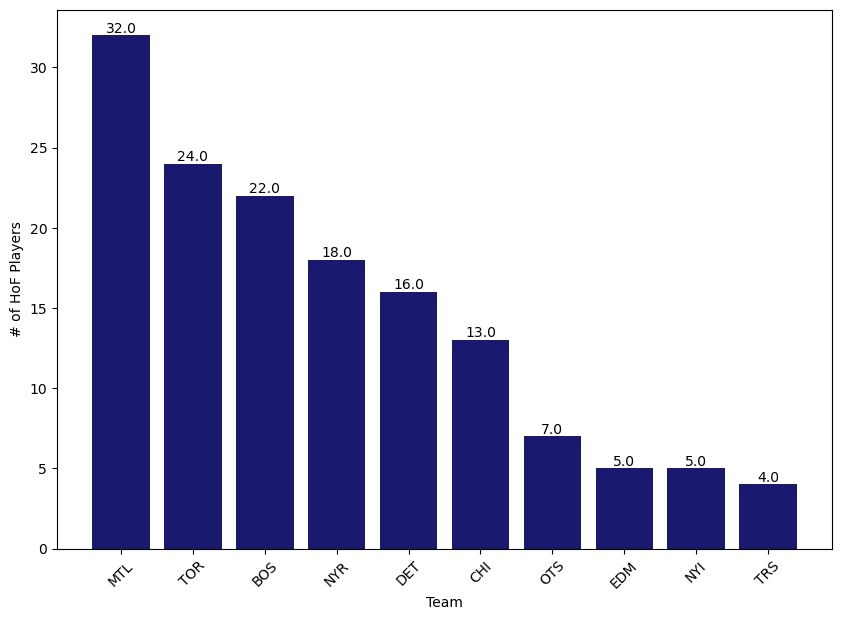

In [243]:
#chart number of hall of famers by team for top teams
plt.figure(figsize=(10, 7))
bars = plt.bar(hofteams10['PrimaryTeam'], hofteams10['freq'], color='midnightblue')
plt.xlabel('Team')
plt.ylabel('# of HoF Players')
plt.xticks(rotation=45, fontsize=10)

for bar in bars:
    height = bar.get_height()
    formatted_value = "{:.1f}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_value, ha='center', va='bottom', fontsize=10)

plt.show()

In [244]:
#create df to show number of hall of famers by position
hofpos = pd.DataFrame(hofplayersdf['pos'])
hofpos['freq'] =1
hofpos = hofpos.groupby(by='pos').agg('sum')
hofpos.sort_values(by='freq', ascending=False, inplace=True)

hofpos4 = hofpos[:4]
hofpos4.reset_index(inplace=True)
hofpos4

,pos,freq
0,C,59
1,D,56
2,R,33
3,L,30


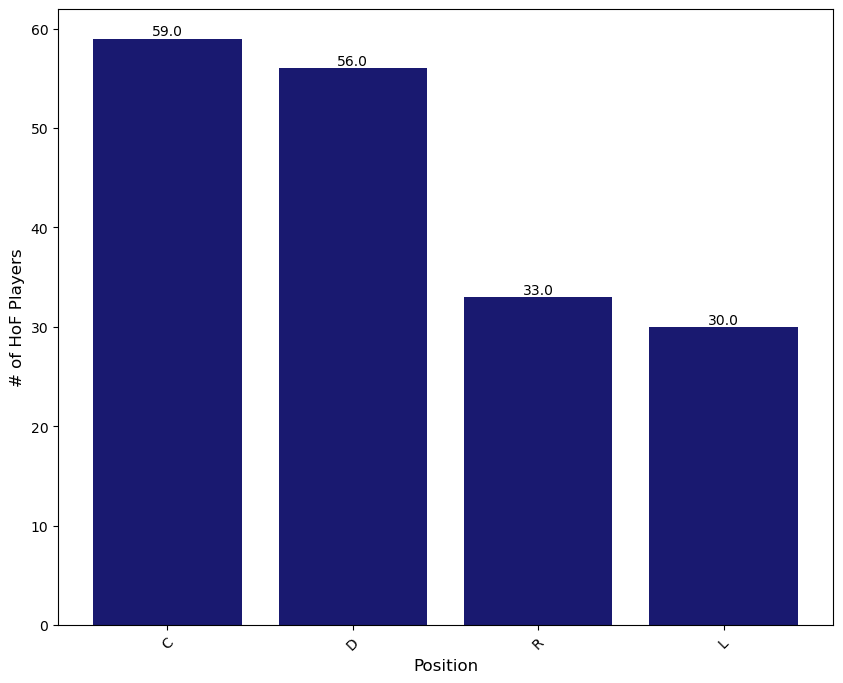

In [245]:
#chart number of hall of famers by position for top positions
plt.figure(figsize=(10, 8))
bars = plt.bar(hofpos4['pos'], hofpos4['freq'], color='midnightblue')
plt.xlabel('Position', fontsize=12)
plt.ylabel('# of HoF Players', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for bar in bars:
    height = bar.get_height()
    formatted_value = "{:.1f}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_value, ha='center', va='bottom', fontsize=10)

plt.show()

In [246]:
#create df of hall of famers by birth country
hofcountry = pd.DataFrame(hofplayersdf['birthCountry'])
hofcountry['freq'] =1
hofcountry = hofcountry.groupby(by='birthCountry').agg('sum')
hofcountry.sort_values(by='freq', ascending=False, inplace=True)

hofcountry3 = hofcountry[:3]
hofcountry3.reset_index(inplace=True)
hofcountry3

,birthCountry,freq
0,Canada,168
1,USA,8
2,Russia,3


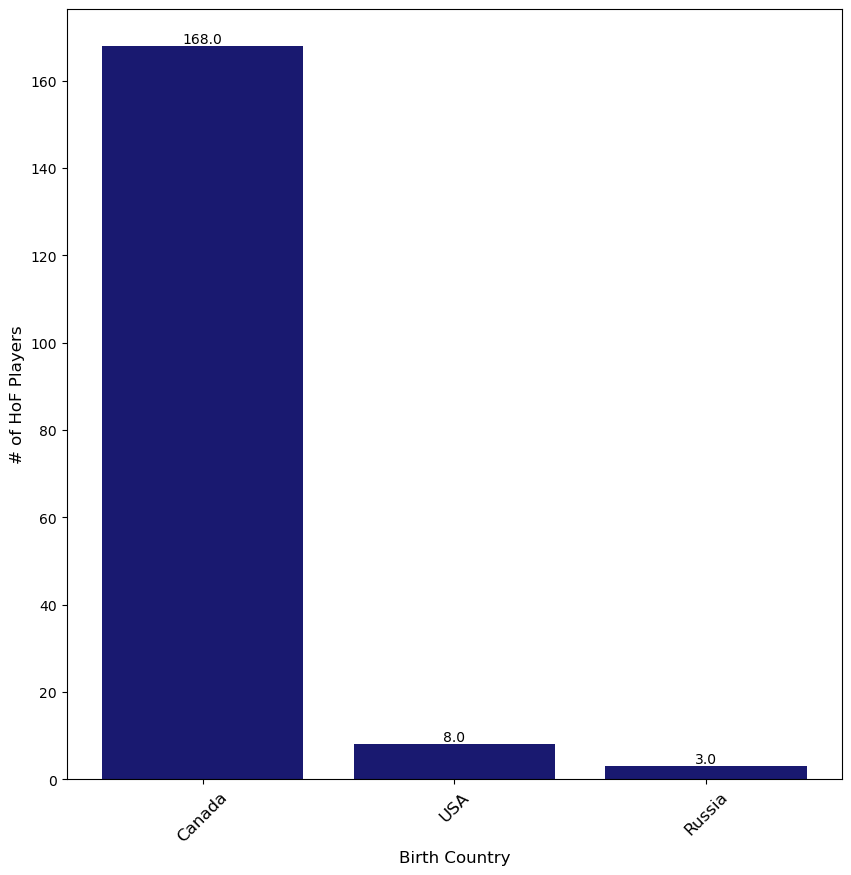

In [247]:
#chart number of hall of famers by birth country for top birth countries
plt.figure(figsize=(10, 10))
bars = plt.bar(hofcountry3['birthCountry'], hofcountry3['freq'], color='midnightblue')
plt.xlabel('Birth Country', fontsize=12)
plt.ylabel('# of HoF Players', fontsize=12)
plt.xticks(rotation=45, fontsize=12)

for bar in bars:
    height = bar.get_height()
    formatted_value = "{:.1f}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_value, ha='center', va='bottom', fontsize=10)

plt.show()

## Preprocessing & Train-Test Split

In [248]:
#feature selection
X = playerstatsdf.drop(columns=['playerID', 'hof_flag'], axis=1)
y = playerstatsdf['hof_flag']

In [249]:
#get categorical feature columns
categorical_features = []
    
for column in X.columns:
    if X[column].dtype == 'object':
            categorical_features.append(column)

categorical_features

['PrimaryTeam', 'pos', 'shootCatch', 'birthCountry', 'birthState']

In [250]:
#upsample to balance dataset
smote = SMOTENC(sampling_strategy='auto',categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [251]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

### One Hot Encode Train

In [252]:
#one-hot encode categorical features - TRAIN
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
dummies = ohe.fit_transform(X_train[categorical_features])

X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(), index=X_train.index)

X_train_onehot.head()

,PrimaryTeam_ATF,PrimaryTeam_ATL,PrimaryTeam_BKN,PrimaryTeam_BOS,PrimaryTeam_BUF,PrimaryTeam_CAL,PrimaryTeam_CAR,PrimaryTeam_CBS,PrimaryTeam_CHI,PrimaryTeam_CLE,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
8932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
#Merge one-hot encoded categorical df to numerical features df
X_train_numeric = X_train.drop(columns=categorical_features, axis=1)
X_train_encoded = pd.concat([X_train_numeric, X_train_onehot], axis=1)
X_train_encoded.head()

,Yearsinlg,numteams,GP,+/-,Post+/-,SCcount,height,weight,firstNHL,lastNHL,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
8932,18,18,1179.092317,29.409818,2.826841,1.000000,72.000000,185.00000,1983.141409,2000.314568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326,1,1,14.000000,0.000000,0.000000,0.000000,71.000000,185.00000,2003.000000,2003.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,6,6,323.000000,0.000000,0.000000,2.000000,71.000000,180.00000,1953.000000,1957.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4092,3,3,28.000000,-17.000000,0.000000,0.000000,69.000000,160.00000,1968.000000,1971.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6862,14,14,952.945650,247.010578,-2.795094,4.204906,74.795094,214.31698,1973.590188,1986.726792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One Hot Encode Test

In [254]:
#one-hot encode categorical features - TEST
dummies_test = ohe.transform(X_test[categorical_features])

X_test_onehot = pd.DataFrame(dummies_test.todense(), columns=ohe.get_feature_names_out(), index=X_test.index)

X_test_onehot.head()

/Users/emilykrueger/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,PrimaryTeam_ATF,PrimaryTeam_ATL,PrimaryTeam_BKN,PrimaryTeam_BOS,PrimaryTeam_BUF,PrimaryTeam_CAL,PrimaryTeam_CAR,PrimaryTeam_CBS,PrimaryTeam_CHI,PrimaryTeam_CLE,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
447,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
#Merge one-hot encoded categorical df to numerical features df
X_test_numeric = X_test.drop(columns=categorical_features, axis=1)
X_test_encoded = pd.concat([X_test_numeric, X_test_onehot], axis=1)
X_test_encoded.head()

,Yearsinlg,numteams,GP,+/-,Post+/-,SCcount,height,weight,firstNHL,lastNHL,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
447,1,1,7.000000,0.0,0.0,0.00000,71.000000,170.000000,1925.000000,1925.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5313,1,1,4.442211,0.0,0.0,0.00000,70.709171,170.912375,1924.848618,1924.848618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3412,9,9,292.000000,0.0,0.0,4.00000,72.000000,175.000000,1932.000000,1939.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4366,1,1,17.000000,0.0,0.0,0.00000,68.000000,180.000000,1948.000000,1948.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5284,7,7,128.000000,0.0,0.0,2.31655,69.683450,159.115146,1917.000000,1922.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scale Train Dataset

In [256]:
#instantiate scaler
scaler = StandardScaler()

In [257]:
#fit scaler on train data and scale train data
X_train_processed = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_train_processed

,Yearsinlg,numteams,GP,+/-,Post+/-,SCcount,height,weight,firstNHL,lastNHL,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
0,1.192199,1.192199,1.456312,-0.028978,0.210706,-0.193163,0.314350,-0.006599,0.898098,1.200654,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
1,-1.306026,-1.306026,-1.035417,-0.298635,-0.123544,-0.745894,-0.177999,-0.006599,1.670443,1.304237,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2,-0.571254,-0.571254,-0.374573,-0.298635,-0.123544,0.359567,-0.177999,-0.299563,-0.274168,-0.470082,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
3,-1.012117,-1.012117,-1.005476,-0.454507,-0.123544,-0.745894,-1.162697,-1.471420,0.309215,0.069928,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
4,0.604381,0.604381,0.972663,1.966193,-0.454039,1.578287,1.690511,1.711166,0.526630,0.676544,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,0.604381,0.604381,0.325913,-0.298635,-0.123544,0.912298,-1.414785,-2.325474,-1.132600,-0.935418,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
6801,2.073925,2.073925,2.170508,1.084293,3.134446,0.265943,0.230953,0.060007,0.860294,1.244305,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
6802,0.163518,0.163518,-0.030641,-0.298635,-0.123544,0.258557,-0.045553,-0.220753,-0.998906,-0.925899,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
6803,0.016563,0.016563,-0.543527,-0.298635,-0.123544,-0.193163,-0.177999,0.286365,-1.674289,-1.665818,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123


### Scale Test Dataset

In [258]:
#scale test data
X_test_processed = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test_encoded.columns)
X_test_processed

,Yearsinlg,numteams,GP,+/-,Post+/-,SCcount,height,weight,firstNHL,lastNHL,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
0,-1.306026,-1.306026,-1.050388,-0.298635,-0.123544,-0.745894,-0.177999,-0.885492,-1.363151,-1.704390,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
1,-1.306026,-1.306026,-1.055858,-0.298635,-0.123544,-0.745894,-0.321189,-0.832033,-1.369038,-1.710229,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2,-0.130391,-0.130391,-0.440871,-0.298635,-0.123544,1.465029,0.314350,-0.592528,-1.090905,-1.164380,...,-0.036391,-0.017146,3.753491,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
3,-1.306026,-1.306026,-1.029001,-0.298635,-0.123544,-0.745894,-1.655045,-0.299563,-0.468630,-0.817231,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
4,-0.424300,-0.424300,-0.791611,-0.298635,-0.123544,0.534534,-0.826201,-1.523266,-1.674289,-1.820107,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,0.310472,0.310472,0.424131,1.683603,-0.289592,2.053016,1.222223,0.047855,0.203302,0.279482,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2265,0.016563,0.016563,-0.411401,-0.298635,-0.123544,0.359567,0.160140,0.099308,-0.766951,-0.826984,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2266,0.898290,0.898290,0.592714,-0.298635,-0.123544,0.359567,0.314350,0.045570,-0.942262,-0.592667,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2267,0.898290,0.898290,0.465674,-0.314883,-0.123544,0.849325,-0.670348,-1.595653,-1.169430,-0.895110,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123


In [259]:
#Check shape of final test and train datasets
print(X_train_processed.shape)
print(X_test_processed.shape)

(6805, 180)
(2269, 180)


- Now both train and test are preprocessed independently in the same manner for use down the road.

## Hall of Fame Predictor Model

### Baseline Model

In [260]:
#updated max iterations because cannot converge. Set to 5k
baseline_log_model = LogisticRegression(random_state=42, max_iter=5000, penalty=None)
baseline_log_model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=42)

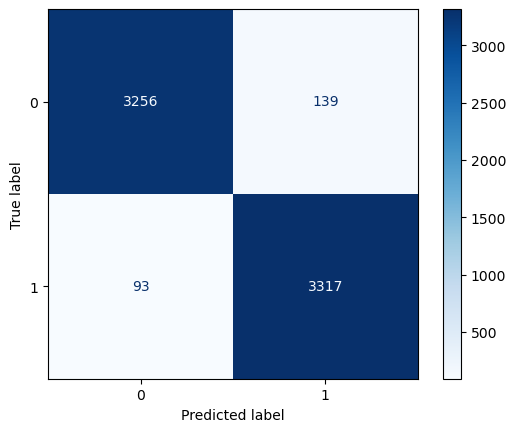

In [261]:
#Confusion Matrix - train
ConfusionMatrixDisplay.from_estimator(baseline_log_model, X_train_processed, y_train, cmap='Blues')

In [262]:
#pred y
y_pred_base = baseline_log_model.predict(X_train_processed)

In [263]:
#baseline accuracy score
baseline_log_model.score(X_train_processed, y_train)


0.9659074210139603

In [264]:
#baseline precision score
precision_score(y_train, y_pred_base)

0.9597800925925926

In [265]:
#baseline recall score
recall_score(y_train, y_pred_base)

0.9727272727272728

In [266]:
#baseline f1 score
f1_score(y_train, y_pred_base)

0.9662103116807458

In [267]:
#cross validate baseline 
cv_results = cross_validate(estimator=baseline_log_model,
                           X=X_train_processed,
                           y=y_train,
                           cv=5,
                           scoring=['precision'],
                           return_train_score=True)

print(cv_results['train_precision'].mean())
print(cv_results['test_precision'].mean())

0.960904124127482
0.9514958287798538


### Adjust Threshold Baseline Model (Baseline has performed best in comparison to others)

In [268]:
#set custom threshold
threshold = 0.8

In [269]:
#store predicted probabilities of class 1
y_probs = baseline_log_model.predict_proba(X_train_processed)[:, 1]
y_new_preds = (y_probs >= threshold).astype(int)

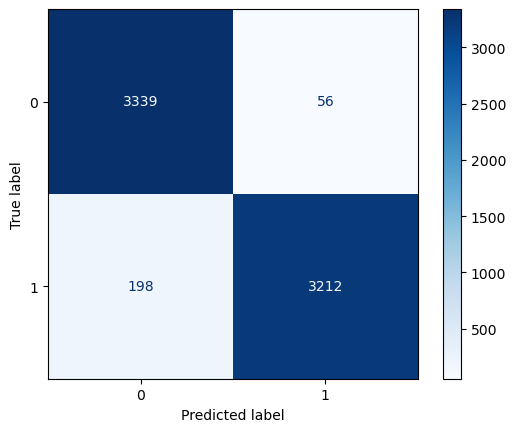

In [270]:
ConfusionMatrixDisplay.from_predictions(y_train, y_new_preds, cmap='Blues')

In [271]:
accuracy_score(y_train, y_new_preds)

0.9626745040411462

In [272]:
precision_score(y_train, y_new_preds)

0.9828641370869033

In [273]:
recall_score(y_train, y_new_preds)

0.9419354838709677

In [274]:
f1_score(y_train, y_new_preds)

0.9619646600778676

In [275]:
#perform cross validation at the new threshold. Need to do this manually using KFolds because we've define a custom threshold

kf = KFold(n_splits=5)
test_precision_scores = []
train_precision_scores = []
for train_idx, test_idx in kf.split(X_train_processed):
    train_X, test_X = X_train_processed.iloc[train_idx], X_train_processed.iloc[test_idx]
    train_y, test_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = LogisticRegression(random_state=42, max_iter=5000, penalty=None)
    model.fit(train_X, train_y)
    
    # Make predictions with the custom threshold
    new_predictions_train = (model.predict_proba(train_X)[:, 1] >= threshold).astype(int)
    new_predictions_test = (model.predict_proba(test_X)[:, 1] >= threshold).astype(int)
    
    # Calculate precision for this fold
    precision_test = precision_score(test_y, new_predictions_test)
    test_precision_scores.append(precision_test)

    precision_train = precision_score(train_y, new_predictions_train)
    train_precision_scores.append(precision_train)

# Calculate the mean precision score across folds
train_mean_precision = np.mean(train_precision_scores)
test_mean_precision = np.mean(test_precision_scores)

print(train_mean_precision)
print(test_mean_precision)

0.9828595335236155
0.9751980053681558


### Ridge Regularization Model

In [276]:
#create model with 12 regularization
ridge_model = LogisticRegression(random_state=42, max_iter=5000, penalty='l2')
ridge_model.fit(X_train_processed, y_train)


LogisticRegression(max_iter=5000, random_state=42)

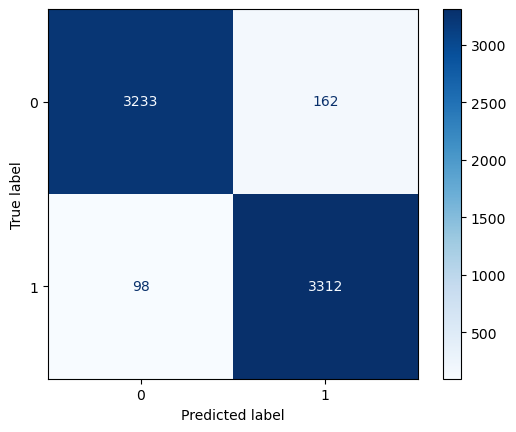

In [277]:
ConfusionMatrixDisplay.from_estimator(ridge_model, X_train_processed, y_train, cmap='Blues')

In [278]:
#predict y
y_pred_ridge = ridge_model.predict(X_train_processed)

In [279]:
#train accuracy for ridge model
ridge_model.score(X_train_processed, y_train)

0.9617927994121969

In [280]:
#train ridge model precision
precision_score(y_train, y_pred_ridge)

0.9533678756476683

In [281]:
#train ridge model recall
recall_score(y_train, y_pred_ridge)

0.9712609970674487

In [282]:
#train ridge model f1
f1_score(y_train, y_pred_ridge)

0.9622312608948286

In [283]:
#Cross validate precision score
ridge_cv_results = cross_validate(estimator=ridge_model,
                           X=X_train_processed,
                           y=y_train,
                           cv=5,
                           scoring=['precision'],
                           return_train_score=True)
print(ridge_cv_results['train_precision'].mean())
print(ridge_cv_results['test_precision'].mean())

0.9539808008189574
0.947730789407573


### Lasso Regularization Model

In [284]:
#create model with l1 regularization
lasso_model = LogisticRegression(random_state=42, max_iter=5000, penalty='l1', solver='liblinear')
lasso_model.fit(X_train_processed, y_train)


LogisticRegression(max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')

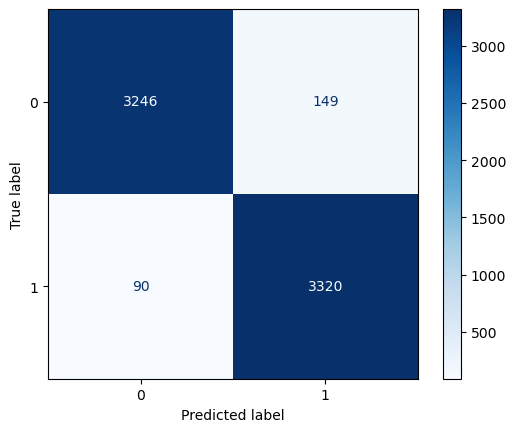

In [285]:
ConfusionMatrixDisplay.from_estimator(lasso_model, X_train_processed, y_train, cmap='Blues')

In [286]:
#predict y with lasso model
y_pred_lasso = lasso_model.predict(X_train_processed)

In [287]:
#train accuracy with lasso model
lasso_model.score(X_train_processed, y_train)

0.9648787656135195

In [288]:
#train precision with lasso model
precision_score(y_train, y_pred_lasso)

0.957048140674546

In [289]:
#train recall with lasso model
recall_score(y_train, y_pred_lasso)

0.9736070381231672

In [290]:
#train f1 with lasso model
f1_score(y_train, y_pred_lasso)

0.9652565779909871

In [291]:
#Cross validate lasso model
lasso_cv_results = cross_validate(estimator=lasso_model,
                           X=X_train_processed,
                           y=y_train,
                           cv=5,
                           scoring=['precision'],
                           return_train_score=True)
print(lasso_cv_results['train_precision'].mean())
print(lasso_cv_results['test_precision'].mean())

0.9582645936325772
0.9499082261379439


### Create ROC Chart to Compare Further

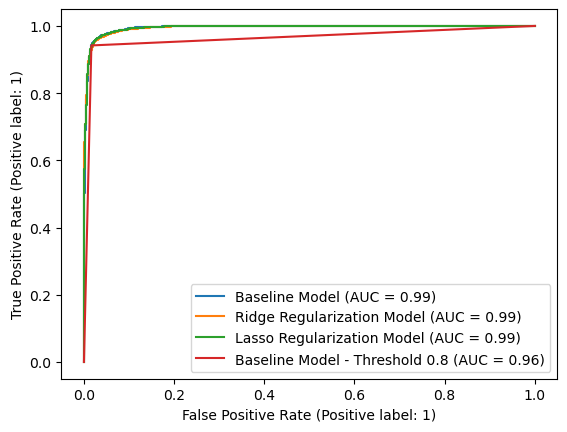

In [292]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(baseline_log_model, X_train_processed, y_train, 
                name='Baseline Model', ax=ax)
RocCurveDisplay.from_estimator(ridge_model, X_train_processed, y_train, 
               name='Ridge Regularization Model', ax=ax)
RocCurveDisplay.from_estimator(lasso_model, X_train_processed, y_train, 
               name='Lasso Regularization Model', ax=ax)
RocCurveDisplay.from_predictions(y_train, y_new_preds, 
               name='Baseline Model - Threshold 0.8', ax=ax);

- very little noticeable different between the three. All performing well with 0.99. Sacrifice accuracy when
  we set threhold hold to 0.96, but worth it to increase precision

### Final Model - Coefficients

In [293]:
final_model = baseline_log_model
final_coefs = final_model.coef_
final_coefs = final_coefs[0]
final_coefs

array([-1.15475976e+00, -1.15475976e+00,  1.91207910e+00,  9.57380961e-01,
        2.71564150e-01,  7.21779860e-01,  3.34635057e-01,  4.06714351e-01,
       -2.97774409e+00,  1.31814280e+01, -1.34363018e+01, -4.01448094e-01,
       -2.34174906e-01,  1.45267096e+00,  3.20954614e-01,  8.04220014e-01,
       -8.44597616e-02,  4.26883630e-01,  1.15887917e+00,  6.91662170e-01,
       -6.31126816e-01, -1.30201900e+00, -1.88888128e-01, -8.20747667e-01,
        8.72121335e-02,  1.53124085e-01,  1.30349636e-01,  2.35993995e-01,
        1.26728073e+00, -7.46314582e-01, -9.32854011e-01,  1.90605321e-01,
       -3.56901136e-01,  2.23578426e-01, -6.95408975e-01, -4.57411667e-01,
       -3.96870680e-01,  1.06880155e+00,  2.98854418e-01,  3.79534805e-01,
       -8.91749000e-01, -5.18731936e-01,  9.44074337e-01, -6.46223108e-01,
        5.05997030e-01, -6.71361346e-01, -1.34721553e+00, -1.18161933e+00,
        1.16344263e+00,  4.35077364e-01, -2.89652768e-01,  1.67235500e-01,
       -9.10983196e-01,  

In [294]:
coef_dict = dict(zip(X_train_processed.columns, final_coefs))
coef_dict
                 

{'Yearsinlg': -1.1547597633704045,
 'numteams': -1.1547597633704045,
 'GP': 1.9120790976906386,
 '+/-': 0.9573809613786425,
 'Post+/-': 0.2715641496630858,
 'SCcount': 0.7217798603629142,
 'height': 0.33463505695222673,
 'weight': 0.4067143507239159,
 'firstNHL': -2.9777440886832407,
 'lastNHL': 13.18142803523688,
 'birthYear': -13.436301803337745,
 'birthMon': -0.40144809368993944,
 'birthDay': -0.23417490607979052,
 'G_per_szn': 1.452670955830986,
 'A_per_szn': 0.3209546137957771,
 'Pts_per_szn': 0.8042200144824895,
 'PIM_per_szn': -0.0844597616465405,
 'PPG_per_szn': 0.4268836298424219,
 'PPA_per_szn': 1.1588791659682451,
 'SHG_per_szn': 0.6916621699993979,
 'SHA_per_szn': -0.6311268162561534,
 'GWG_per_szn': -1.3020190046855726,
 'GTG_per_szn': -0.18888812772867053,
 'SOG_per_szn': -0.820747667189867,
 'PostG_per_szn': 0.08721213353896642,
 'PostA_per_szn': 0.15312408516176867,
 'PostPts_per_szn': 0.130349635904404,
 'PostPIM_per_szn': 0.23599399452081055,
 'PostPPG_per_szn': 1.267

In [295]:
#This would be more important if my final model was a lasso model where many feature coeffs are reduced to 0
def remove_zeroes_from_dict(dict):
    remove_zero_val = [ ]

    for key, value in dict.items():
        if value == 0:
            remove_zero_val.append(key)
            
    for key in remove_zero_val:
        del dict[key]

    return dict


In [296]:
remove_zeroes_from_dict(coef_dict)


{'Yearsinlg': -1.1547597633704045,
 'numteams': -1.1547597633704045,
 'GP': 1.9120790976906386,
 '+/-': 0.9573809613786425,
 'Post+/-': 0.2715641496630858,
 'SCcount': 0.7217798603629142,
 'height': 0.33463505695222673,
 'weight': 0.4067143507239159,
 'firstNHL': -2.9777440886832407,
 'lastNHL': 13.18142803523688,
 'birthYear': -13.436301803337745,
 'birthMon': -0.40144809368993944,
 'birthDay': -0.23417490607979052,
 'G_per_szn': 1.452670955830986,
 'A_per_szn': 0.3209546137957771,
 'Pts_per_szn': 0.8042200144824895,
 'PIM_per_szn': -0.0844597616465405,
 'PPG_per_szn': 0.4268836298424219,
 'PPA_per_szn': 1.1588791659682451,
 'SHG_per_szn': 0.6916621699993979,
 'SHA_per_szn': -0.6311268162561534,
 'GWG_per_szn': -1.3020190046855726,
 'GTG_per_szn': -0.18888812772867053,
 'SOG_per_szn': -0.820747667189867,
 'PostG_per_szn': 0.08721213353896642,
 'PostA_per_szn': 0.15312408516176867,
 'PostPts_per_szn': 0.130349635904404,
 'PostPIM_per_szn': 0.23599399452081055,
 'PostPPG_per_szn': 1.267

In [297]:
#order dictionary largest mag to smallest mag
coef_dict_sorted = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
coef_dict_sorted

{'lastNHL': 13.18142803523688,
 'birthState_NotUSCA': 3.011908502967738,
 'birthCountry_Canada': 2.7916022594557792,
 'GP': 1.9120790976906386,
 'birthState_MN': 1.5602143065895224,
 'PrimaryTeam_NYR': 1.5040403558591422,
 'birthState_MA': 1.4802004021887993,
 'G_per_szn': 1.452670955830986,
 'PrimaryTeam_TOR': 1.371899535472921,
 'birthState_MI': 1.2782028600874755,
 'PrimaryTeam_MTL': 1.2764714736286216,
 'PostPPG_per_szn': 1.2672807305009905,
 'PrimaryTeam_DET': 1.1634426316632334,
 'PPA_per_szn': 1.1588791659682451,
 'PrimaryTeam_BOS': 1.0688015529802806,
 'PrimaryTeam_OTS': 0.9840293637885494,
 '+/-': 0.9573809613786425,
 'PrimaryTeam_MTW': 0.9559454289531691,
 'PrimaryTeam_CHI': 0.9440743370455967,
 'birthState_TX': 0.930478799622594,
 'birthState_NY': 0.9062832359115213,
 'Pts_per_szn': 0.8042200144824895,
 'birthState_ON': 0.787976852039079,
 'birthCountry_Taiwan': 0.7530157794823493,
 'SCcount': 0.7217798603629142,
 'SHG_per_szn': 0.6916621699993979,
 'birthState_MO': 0.551379

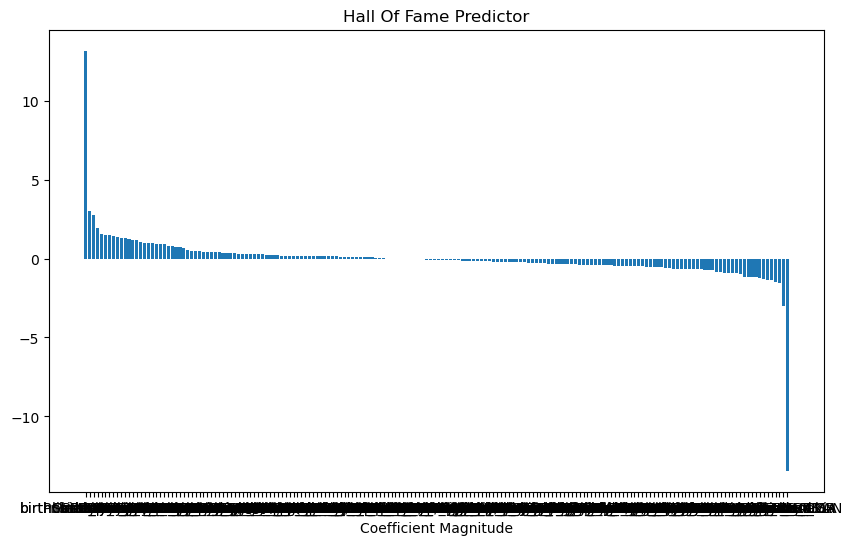

In [298]:
plt.figure(figsize=(10, 6))
plt.bar(list(coef_dict_sorted.keys()), coef_dict_sorted.values())
plt.xlabel('Coefficient Magnitude')
plt.title('Hall Of Fame Predictor')
plt.show()


In [299]:
positive_dict = {k: v for k, v in coef_dict_sorted.items() if v >= 0}
negative_dict = {k: abs(v) for k, v in coef_dict_sorted.items() if v < 0}
top_ten_pos = dict(sorted(positive_dict.items(), key=lambda item: item[1], reverse=True)[:10])
bottom_ten_abs = dict(sorted(negative_dict.items(), key=lambda item: item[1], reverse=True)[:10])

print(top_ten_pos)
print(bottom_ten_abs)

{'lastNHL': 13.18142803523688, 'birthState_NotUSCA': 3.011908502967738, 'birthCountry_Canada': 2.7916022594557792, 'GP': 1.9120790976906386, 'birthState_MN': 1.5602143065895224, 'PrimaryTeam_NYR': 1.5040403558591422, 'birthState_MA': 1.4802004021887993, 'G_per_szn': 1.452670955830986, 'PrimaryTeam_TOR': 1.371899535472921, 'birthState_MI': 1.2782028600874755}
{'birthYear': 13.436301803337745, 'firstNHL': 2.9777440886832407, 'PrimaryTeam_VAN': 1.5394022857970426, 'birthCountry_USA': 1.4806911534016076, 'PrimaryTeam_COR': 1.3472155323455626, 'PrimaryTeam_TBL': 1.3452166157493657, 'GWG_per_szn': 1.3020190046855726, 'birthCountry_Slovakia': 1.2243038356737088, 'PrimaryTeam_PIP': 1.1945704922784235, 'PrimaryTeam_DAL': 1.1816193333417842}


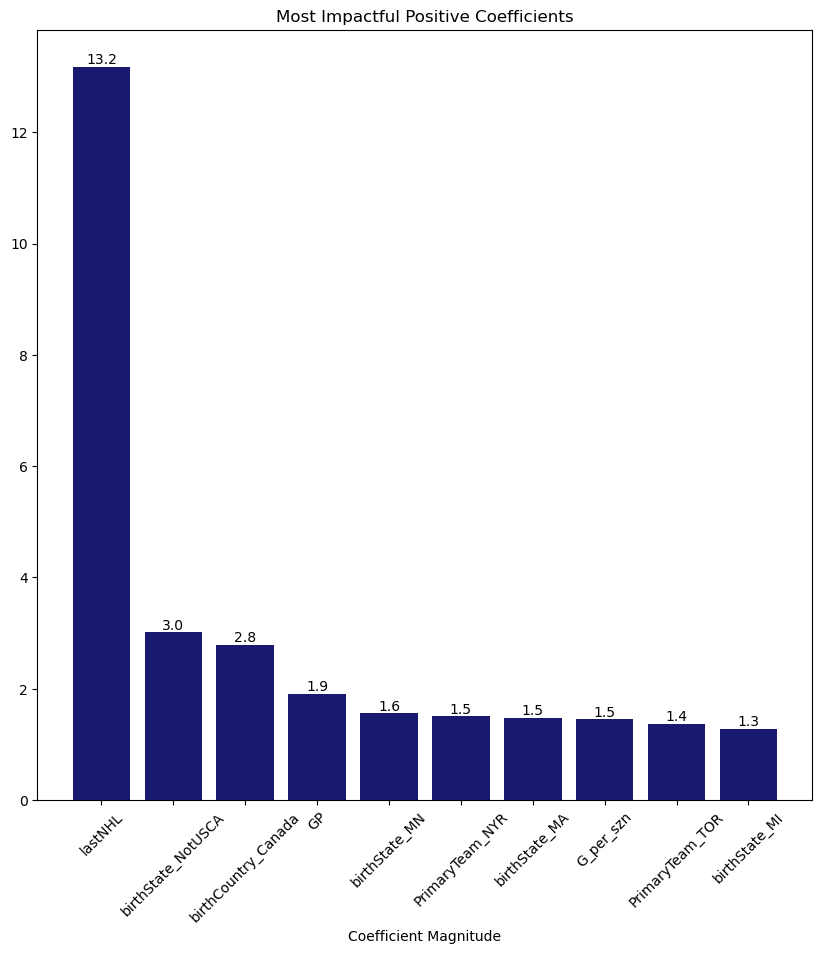

In [300]:
#Top ten pos chart
plt.figure(figsize=(10, 10))
bars = plt.bar(list(top_ten_pos.keys()), top_ten_pos.values(), color='midnightblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Most Impactful Positive Coefficients')
plt.xticks(rotation=45, fontsize=10)

for bar in bars:
    height = bar.get_height()
    formatted_value = "{:.1f}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_value, ha='center', va='bottom', fontsize=10)

plt.show()

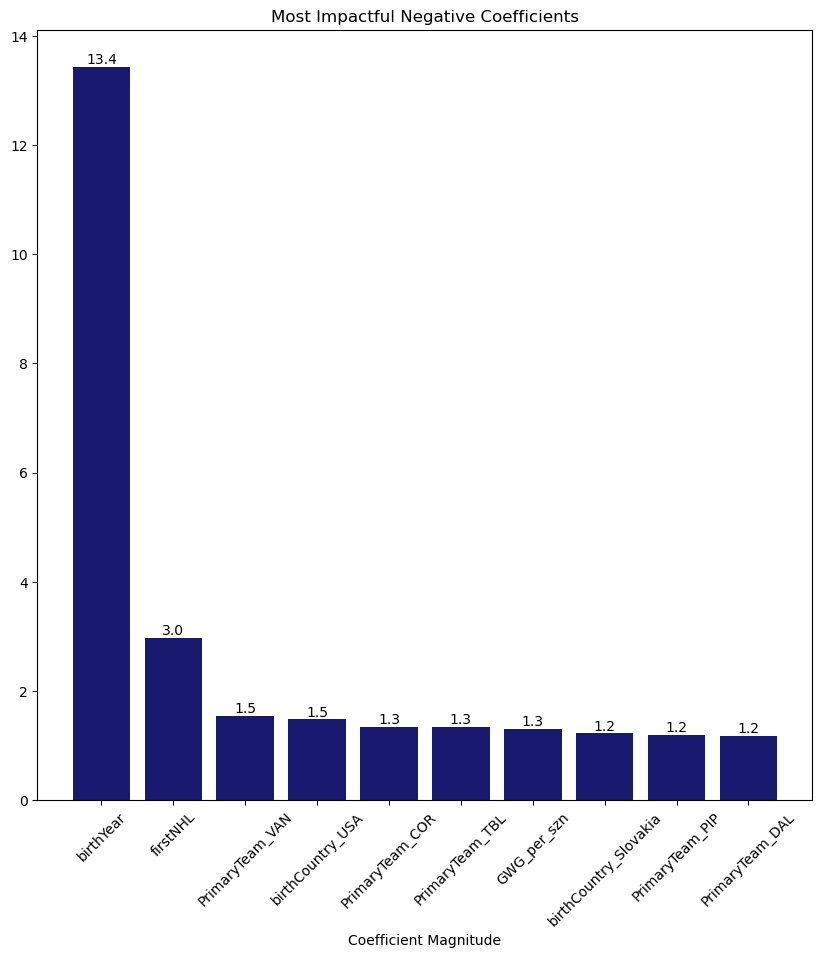

In [301]:
#Top ten pos chart
plt.figure(figsize=(10, 10))
bars = plt.bar(list(bottom_ten_abs.keys()), bottom_ten_abs.values(), color='midnightblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Most Impactful Negative Coefficients')
plt.xticks(rotation=45, fontsize=10)

#add labels with value of coeff
for bar in bars:
    height = bar.get_height()
    formatted_value = "{:.1f}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatted_value, ha='center', va='bottom', fontsize=10)
    
plt.show()

### Final Model Evaluation

In [302]:
#check X_test_processed - preprocessed same as train above
X_test_processed

,Yearsinlg,numteams,GP,+/-,Post+/-,SCcount,height,weight,firstNHL,lastNHL,...,birthState_RI,birthState_SD,birthState_SK,birthState_TX,birthState_UT,birthState_VA,birthState_VT,birthState_WA,birthState_WI,birthState_WY
0,-1.306026,-1.306026,-1.050388,-0.298635,-0.123544,-0.745894,-0.177999,-0.885492,-1.363151,-1.704390,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
1,-1.306026,-1.306026,-1.055858,-0.298635,-0.123544,-0.745894,-0.321189,-0.832033,-1.369038,-1.710229,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2,-0.130391,-0.130391,-0.440871,-0.298635,-0.123544,1.465029,0.314350,-0.592528,-1.090905,-1.164380,...,-0.036391,-0.017146,3.753491,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
3,-1.306026,-1.306026,-1.029001,-0.298635,-0.123544,-0.745894,-1.655045,-0.299563,-0.468630,-0.817231,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
4,-0.424300,-0.424300,-0.791611,-0.298635,-0.123544,0.534534,-0.826201,-1.523266,-1.674289,-1.820107,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,0.310472,0.310472,0.424131,1.683603,-0.289592,2.053016,1.222223,0.047855,0.203302,0.279482,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2265,0.016563,0.016563,-0.411401,-0.298635,-0.123544,0.359567,0.160140,0.099308,-0.766951,-0.826984,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2266,0.898290,0.898290,0.592714,-0.298635,-0.123544,0.359567,0.314350,0.045570,-0.942262,-0.592667,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123
2267,0.898290,0.898290,0.465674,-0.314883,-0.123544,0.849325,-0.670348,-1.595653,-1.169430,-0.895110,...,-0.036391,-0.017146,-0.266419,-0.040238,-0.012123,-0.021001,-0.012123,-0.032089,-0.036391,-0.012123


In [303]:
#predict y with X_test
y_pred_final = final_model.predict(X_test_processed)

In [304]:
#calc recall score on unseen data
recall_score(y_test, y_pred_final)

0.966282165039929

In [305]:
#calc precision score on unseen data
precision_score(y_test, y_pred_final)

0.9502617801047121

In [306]:
#calc accuracy score on unseen data
accuracy_score(y_test, y_pred_final)

0.9581313353900397

In [307]:
#calc f1 score on unseen data
f1_score(y_test, y_pred_final)

0.9582050153981523

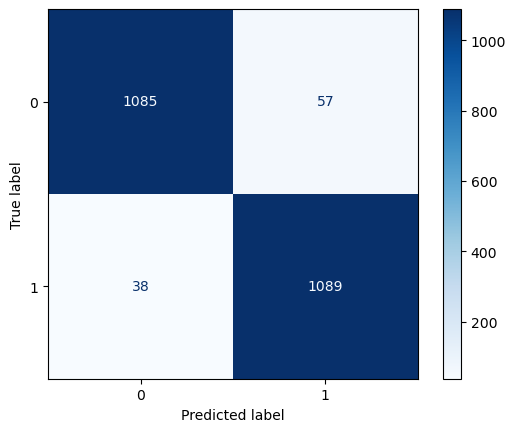

In [308]:
#plot confusion matrix of final model on unseen data
ConfusionMatrixDisplay.from_estimator(final_model, X_test_processed, y_test, cmap='Blues')

In [309]:
#adjust threshold to 0.8 as define above
threshold = 0.8
y_probs_final = final_model.predict_proba(X_test_processed)[:, 1]
y_final_new_preds = (y_probs_final >= threshold).astype(int)

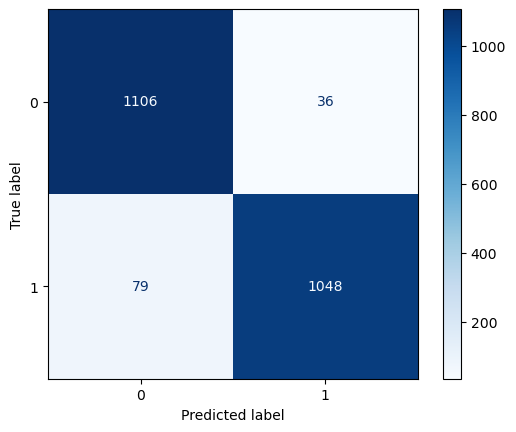

In [310]:
ConfusionMatrixDisplay.from_predictions(y_test, y_final_new_preds, cmap='Blues')

In [311]:
accuracy_score(y_test, y_final_new_preds)

0.9493168796826796

In [312]:
precision_score(y_test, y_final_new_preds)

0.966789667896679

In [313]:
recall_score(y_test, y_final_new_preds)

0.929902395740905

In [314]:
f1_score(y_test, y_final_new_preds)

0.9479873360470377

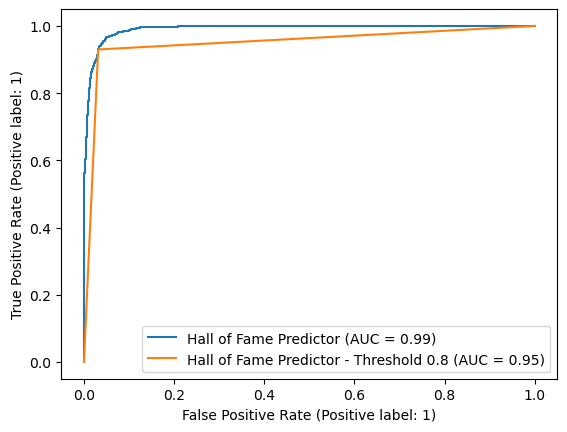

In [315]:
#Plot ROC curve to observe performance
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(final_model, X_test_processed, y_test,
                name='Hall of Fame Predictor', ax=ax)

RocCurveDisplay.from_predictions(y_test, y_final_new_preds,
                name='Hall of Fame Predictor - Threshold 0.8', ax=ax);